In [3]:
## COVID Recovery forecasting using Facebook Prophet ##
## The original data used for analysis is obtained from https://github.com/CSSEGISandData/COVID-19 ##

## Importing libraries ##

import pandas as pd
import fbprophet
import matplotlib.pyplot as plt

In [4]:
## Load csv ##

data = pd.read_csv('covid_recovery_world.csv')
data

,Date,count
0,1/22/2020,28
1,1/23/2020,30
2,1/24/2020,36
3,1/25/2020,39
4,1/26/2020,52
...,...,...
67,3/29/2020,149082
68,3/30/2020,164566
69,3/31/2020,178034
70,4/1/2020,193177


In [5]:
## processing data ##

df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Date'])
df['y'] = data['count']

df

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
67,2020-03-29,149082
68,2020-03-30,164566
69,2020-03-31,178034
70,2020-04-01,193177


In [6]:
## Prophet model ##

prophet = fbprophet.Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
## predicting the recovery rate for next two month ##

future = prophet.make_future_dataframe(periods=2, freq='M')
forecast = prophet.predict(future)

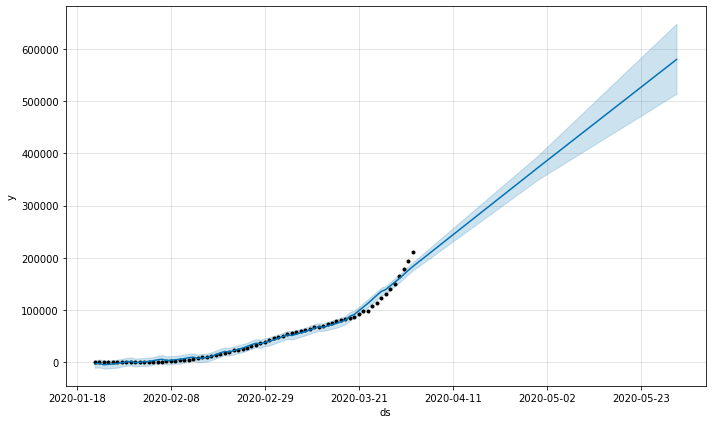

In [8]:
## ploting forecast ##

fig = prophet.plot(forecast)

In [9]:
## predicting the recovery rate for next one year ##

future = prophet.make_future_dataframe(periods=1, freq='Y')
forecast = prophet.predict(future)

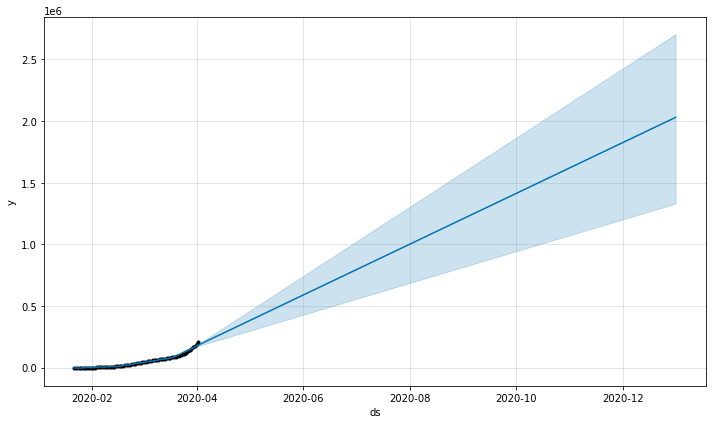

In [10]:
## ploting forecast ##

fig = prophet.plot(forecast)

In [11]:
## predicting the recovery rate for next 7 days ##

future = prophet.make_future_dataframe(periods=7, freq='D')
forecast = prophet.predict(future)

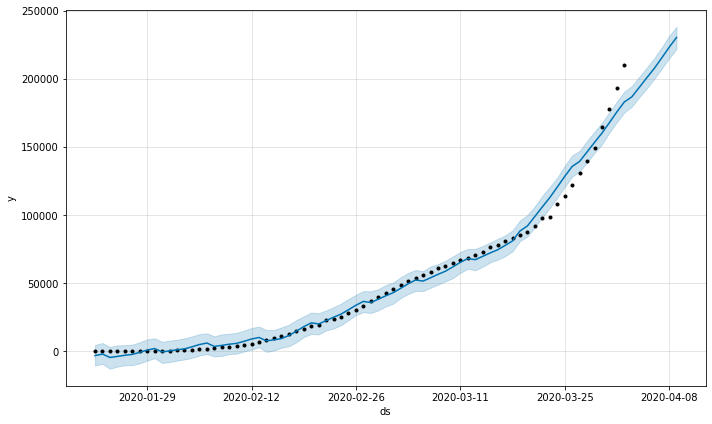

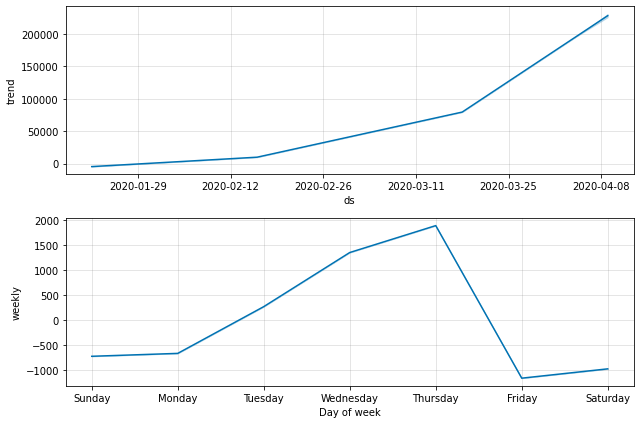

In [12]:
## ploting forecast ##

fig = prophet.plot(forecast)
plt.show()

fig2 = prophet.plot_components(forecast)
plt.show()